# Clustering Intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
os.getcwd()

'/home/Mauritian/Documents/Documents/Ironhack/January 2020/Week8'

In [3]:
df=pd.read_csv('../../May/Week8/BreadBasket_DMS.csv')

In [4]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


# Data preparation

In [7]:
df['datetime']=pd.to_datetime(df.Date+' '+df.Time)

In [8]:
df.head()

,Date,Time,Transaction,Item,datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  object        
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
 4   datetime     21293 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 831.9+ KB


In [11]:
df.Item.nunique()

95

In [12]:
df.Item.value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Chicken sand         1
Gift voucher         1
Bacon                1
Raw bars             1
Olum & polenta       1
Name: Item, Length: 95, dtype: int64

In [13]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
other_food = [x for x in df.Item.unique() if x not in beverage 
                and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch]

In [14]:
df['beverage']=np.where(df.Item.isin(beverage),1,0)
df['other']=np.where(df.Item.isin(other),1,0)
df['kids']=np.where(df.Item.isin(kids),1,0)
df['snacks']=np.where(df.Item.isin(snacks),1,0)
df['bread']=np.where(df.Item.isin(bread),1,0)
df['breakfast_pastry']=np.where(df.Item.isin(breakfast_pastry),1,0)
df['breakfast']=np.where(df.Item.isin(breakfast),1,0)
df['dessert']=np.where(df.Item.isin(dessert),1,0)
df['condiments']=np.where(df.Item.isin(condiments),1,0)
df['lunch']=np.where(df.Item.isin(lunch),1,0)
df['other_food']=np.where(df.Item.isin(other_food),1,0)

In [15]:
df.head()

,Date,Time,Transaction,Item,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,1,0,0


In [16]:
df_group=df.groupby(['Transaction','datetime']).sum().reset_index(level='datetime')

In [18]:
df_group['hour']=df_group.datetime.dt.hour
df_group['day']=df_group.datetime.dt.day_name()

In [19]:
df_group.head()

,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,day
Transaction,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,9,Sunday
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0,10,Sunday
3,2016-10-30 10:07:57,1,0,0,0,0,0,0,1,1,0,0,10,Sunday
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0,10,Sunday
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0,10,Sunday


In [20]:
df_group.day.value_counts()

Saturday     2068
Friday       1488
Sunday       1264
Thursday     1252
Tuesday      1203
Monday       1135
Wednesday    1121
Name: day, dtype: int64

In [21]:
df_group.hour.value_counts()

11    1445
12    1347
10    1267
13    1163
14    1130
9     1007
15     924
16     583
8      375
17     160
18      52
19      34
7       16
20      15
22       7
23       3
21       2
1        1
Name: hour, dtype: int64

In [25]:
df_ml=df_group.drop('datetime',axis=1).copy()
df_ml=pd.get_dummies(data=df_ml, columns=['day'],drop_first=True)

In [27]:
df_ml.sample(10)

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Transaction,,,,,,,,,,,,,,,,,,
7343,1,0,0,0,0,0,0,1,0,0,0,13,0,0,0,0,1,0
3506,1,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0
370,1,0,0,0,0,0,0,0,0,0,0,10,0,0,0,1,0,0
2654,1,0,0,0,0,1,0,1,0,0,0,11,1,0,0,0,0,0
1747,1,0,0,0,0,0,0,1,0,0,0,11,0,0,1,0,0,0
2675,0,0,0,0,0,1,0,0,0,0,0,14,1,0,0,0,0,0
5744,2,0,0,0,1,1,0,0,0,0,0,12,0,0,0,0,0,1
3771,0,0,0,0,1,0,0,0,0,0,0,8,0,1,0,0,0,0
6779,0,0,0,0,2,1,0,1,0,0,0,11,0,1,0,0,0,0


# PCA

In [33]:
pca=PCA(0.85)

In [34]:
pca.fit(df_ml)

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
pca.explained_variance_ratio_

array([0.68025369, 0.08917632, 0.03451081, 0.03413873, 0.02743384])

In [37]:
pca_df=pd.DataFrame(pca.transform(df_ml),columns=['pca1','pca2','pca3','pca4','pca5'])

In [38]:
pca_df.head()

,pca1,pca2,pca3,pca4,pca5
0,3.198122,-0.927710,0.243533,0.006125,-0.180226
1,2.228594,-1.275378,1.181638,-0.161534,-0.078216
2,2.108349,0.423910,-0.218946,0.881109,-0.155497
3,2.199661,-0.581693,-0.785464,-0.027864,0.691540
4,2.207516,0.036358,0.441028,-0.333733,0.733569


# Clustering

Since I did this a bunch of times already, I know that we need 5 clusters. But next project we will try to detect the optimal number of clusters using some technics

In [39]:
kmeans=KMeans(5)
df_clusters=kmeans.fit(pca_df)
df_clusters.cluster_centers_

array([[-1.34567129e+00, -2.65549148e-02, -4.24504160e-02,
         3.31112945e-04, -6.06735908e-02],
       [ 2.92571558e+00, -1.80036517e-01, -3.26205547e-02,
         1.21438361e-02,  3.09366576e-02],
       [-3.60463540e+00, -1.91779918e-02,  3.55274493e-02,
         5.34854248e-03,  6.27726570e-02],
       [ 6.77314037e-01, -3.51442719e-01, -6.23759120e-02,
         2.93787119e-02, -4.80626312e-02],
       [ 1.09678582e+00,  1.39852344e+00,  2.67155283e-01,
        -1.12029068e-01,  6.16920907e-02]])

In [41]:
df_ml['cluster']=df_clusters.fit_predict(pca_df)

In [42]:
df_ml.cluster.value_counts()

4    2378
2    2258
3    2191
0    1780
1     924
Name: cluster, dtype: int64

In [44]:
df_ml.reset_index(inplace=True)

In [50]:
df_beautyful=df.drop(df.columns[4:],axis=1)

In [53]:
df_ml[['Transaction','cluster']]

,Transaction,cluster
0,1,4
1,2,4
2,3,4
3,4,4
4,5,4
...,...,...
9526,9680,2
9527,9681,2
9528,9682,2
9529,9683,2


In [54]:
df_beautyful.shape

(21293, 4)

In [56]:
df_merged=pd.merge(df_beautyful,df_ml[['Transaction','cluster']], on='Transaction', how='outer')

In [57]:
df_merged.cluster.value_counts()

2    5296
4    4446
0    4041
3    3934
1    3576
Name: cluster, dtype: int64

In [59]:
pd.crosstab(df_ml.hour, df_ml.cluster)

cluster,0,1,2,3,4
hour,,,,,
1,0,0,0,0,1
7,0,0,0,0,16
8,0,0,0,0,375
9,0,25,0,0,982
10,0,263,0,0,1004
11,0,334,0,1111,0
12,0,267,0,1080,0
13,0,33,1130,0,0
14,0,2,1128,0,0


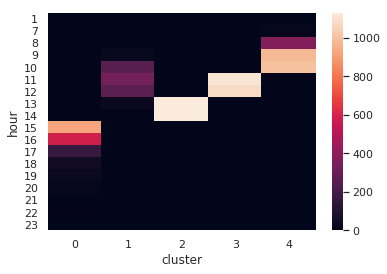

In [60]:
sns.heatmap(pd.crosstab(df_ml.hour, df_ml.cluster))

In [61]:
pd.crosstab(df_group.day,df_ml.cluster)

cluster,0,1,2,3,4
day,,,,,
Friday,269,161,355,357,326
Monday,232,95,250,243,315
Saturday,411,223,506,442,393
Sunday,209,127,304,297,295
Thursday,194,120,264,287,387
Tuesday,223,116,271,293,300
Wednesday,213,71,283,225,329


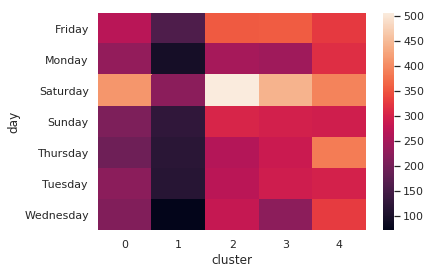

In [62]:
sns.heatmap(pd.crosstab(df_group.day,df_ml.cluster))

In [65]:
a=df_merged.groupby('cluster').Item.value_counts()
b=a.to_frame('counts').reset_index()
b.set_index('Item',inplace=True)
b.groupby('cluster').counts.nlargest(5)

cluster  Item         
0        Coffee            927
         Bread             560
         Tea               382
         Cake              328
         Hot chocolate     183
1        Coffee           1372
         Tea               290
         Hot chocolate     177
         Bread             168
         Pastry            149
2        Coffee           1188
         Bread             677
         Tea               402
         Sandwich          381
         Cake              302
3        Bread             893
         Coffee            821
         NONE              185
         Cake              165
         Pastry            164
4        Coffee           1163
         Bread            1027
         Pastry            389
         Medialuna         260
         Tea               198
Name: counts, dtype: int64

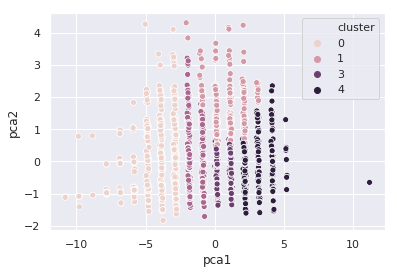

In [71]:
sns.scatterplot(x='pca1',y='pca2',data=pca_df, hue=df_ml.cluster)

In [75]:
df_ml.head()

,Transaction,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,cluster
0,1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,1,0,0,0,4
1,2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,1,0,0,0,4
2,3,1,0,0,0,0,0,0,1,1,0,0,10,0,0,1,0,0,0,4
3,4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,1,0,0,0,4
4,5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,1,0,0,0,4
